<a href="https://colab.research.google.com/github/PrateekKumar88888/Online-Retail-Customer-Segmentation/blob/main/Online_retail_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.


In [1]:
#imorting important libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

# #set style
# # plt.style.use('seaborn')
# sns.set()


# # setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
# plt.rcParams["axes.titlesize"] = 25
# plt.rcParams["axes.titleweight"] = 'bold'
# plt.rcParams['xtick.labelsize']=15
# plt.rcParams['ytick.labelsize']=15
# plt.rcParams["axes.labelsize"] = 20
# plt.rcParams["legend.fontsize"] = 15
# plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')
from numpy import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# path = '/content/drive/MyDrive/ML Unsupervised Capstone/Online Retail.xlsx'

In [4]:
# Read the dataset 'Online retail'.
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Online Retail.xlsx')

In [5]:
# Extracting top 5 record or rows from our dataframe, to have a overview of our data.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# Extracting bottom 5 record from our dataframe.
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
# Shape of dataset.
df.shape

(541909, 8)

### We got to know that our dataset consist 541909 Row's and 8 Column's.

## `DATA WRANGGLING-`

In [8]:
# Looking for datatypes and null values in our data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### **Observations**
* ***If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.***
* ***There are null values in CustomerID and Description.***

Text(0.5, 1.0, 'Visualizing Null Values')

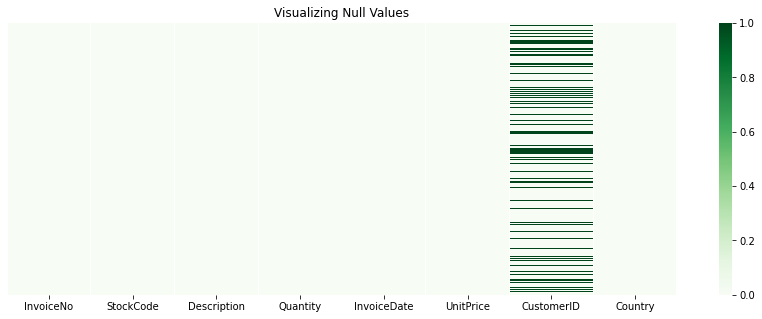

In [10]:
# Visualizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap='Greens', annot=False, yticklabels=False)
plt.title('Visualizing Null Values')

## **Observation-**
1. CustomerID and Description columns has null values.
2. CustomerID is our unique column, and if it contains missing values which means it creates difficulties for analysis.
3. We need to drop all missing values.

In [11]:
# Dropping missing values.
df.dropna(inplace=True) 

In [12]:
df.shape

(406829, 8)

 **After dropping null values we are with 8 columns and 406829 Rows.**

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


* Here we can see that min value for quantity column is negative, which is not possible
* Unit price min value is 0
* So we have look into it.

In [14]:
# Quantity column has some values in negative, which is not possible.
# In invoice number column there are some entries with 'C' which means these are cancelled order as per description.
# So we have to remove those Negative entries and those entries with 'C'.

df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [15]:
# Changing the datatype to string.
df['InvoiceNo'] = df['InvoiceNo'].astype(str)


In [16]:
# If invoice starts with C that means its cancellation order, so we have to remove that entry.
df = df[~df['InvoiceNo'].str.contains('C')]

In [17]:
from numpy.ma.core import count
# Lets see how many Unit price are present where unitprice==0.
len(df[df['UnitPrice']==0])

40

In [18]:
# lets see where UnitPrice is greater than 0.
df = df[df['UnitPrice']>0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [20]:
# Now lets check the shape of oue dataframe, after removing all unneccessry values.
df.shape

(397884, 8)

## **`FEATURE ENGINNERING`**

In [21]:
# Converting Invoicce date to date time format.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%y %H-%M")

In [22]:
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['month_num'] = df['InvoiceDate'].apply(lambda x: x.month)
df['day'] = df['InvoiceDate'].apply(lambda x: x.day)
df['hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['minute'] = df['InvoiceDate'].apply(lambda x: x.minute)

In [23]:
# Extracting month from InvoiceDate.
df['month'] = df['InvoiceDate'].dt.month_name()

In [24]:
# Extracting day from InvoiceDate.
df['day'] = df['InvoiceDate'].dt.day_name()

In [25]:
# Extracting day from InvoiceDate.
df['day'] = df['InvoiceDate'].dt.day_name()

In [26]:
df['total_amount'] = df['Quantity'] * df['UnitPrice']

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day,hour,minute,month,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,Wednesday,8,26,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,8,26,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,Wednesday,8,26,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,8,26,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,8,26,December,20.34


In [28]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day,hour,minute,month,total_amount
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,Friday,12,50,December,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,Friday,12,50,December,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,Friday,12,50,December,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,Friday,12,50,December,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,12,Friday,12,50,December,14.85


## `EDA(Exploratory Data Analysis)`

In [29]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day',
       'hour', 'minute', 'month', 'total_amount'],
      dtype='object')

In [30]:
Top_10_products = df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name', 'Description':'Count'}).head(10)
Top_10_products

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


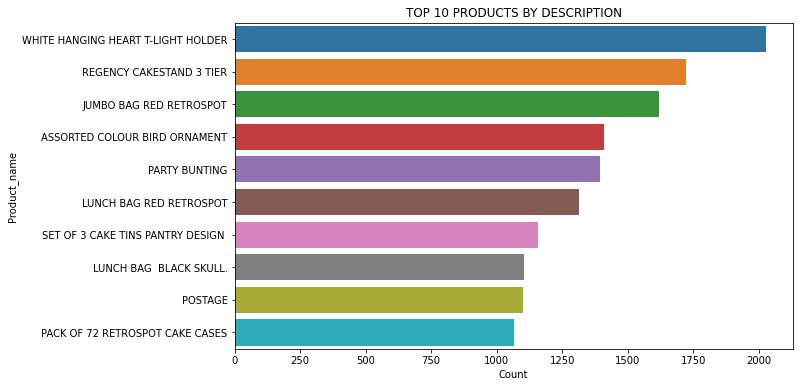

In [31]:
# Top 10 products in terms of description.
plt.figure(figsize=(10,6))
sns.barplot(y=Top_10_products['Product_name'], x=Top_10_products['Count'])
plt.title('TOP 10 PRODUCTS BY DESCRIPTION')
plt.show()

**OBSERVATION-**
* White hanging T-Light holder is most selling product which has almost 2018 unit sold.
* Regency Cakestand 3 Tier is 2nd most sold product after the white hanging t-light holder.

## Top 10 products in terms of stock code.

In [32]:
Top_10_product = df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(10)
Top_10_product

,StockCode,Count
0,85123A,2035
1,22423,1723
2,85099B,1618
3,84879,1408
4,47566,1396
5,20725,1317
6,22720,1159
7,20727,1105
8,POST,1099
9,23203,1098


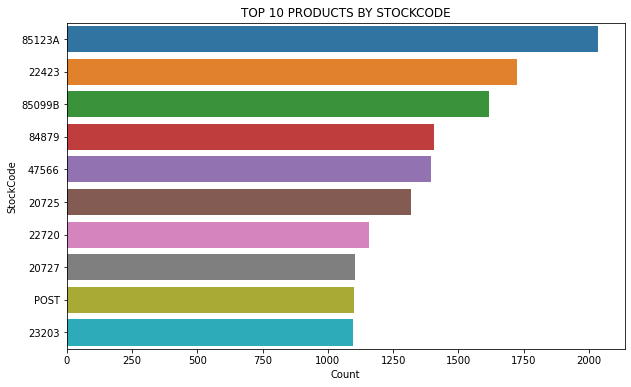

In [33]:
# Visualizing Top 10 products in terms of StockCode.
plt.figure(figsize=(10,6))
sns.barplot(x=Top_10_product['Count'], y=Top_10_product['StockCode'])
plt.title('TOP 10 PRODUCTS BY STOCKCODE')
plt.show()

**OBSERVATION-**
* StockCode-85123A is 1st highest selling product.
* StockCode-22423 is 2nd highest selling product.

In [34]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day',
       'hour', 'minute', 'month', 'total_amount'],
      dtype='object')

In [35]:
Top_10 =df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Count'}).head(10)
Top_10

,CustomerID,Count
0,17841.0,7847
1,14911.0,5675
2,14096.0,5111
3,12748.0,4595
4,14606.0,2700
5,15311.0,2379
6,14646.0,2076
7,13089.0,1818
8,13263.0,1677
9,14298.0,1637


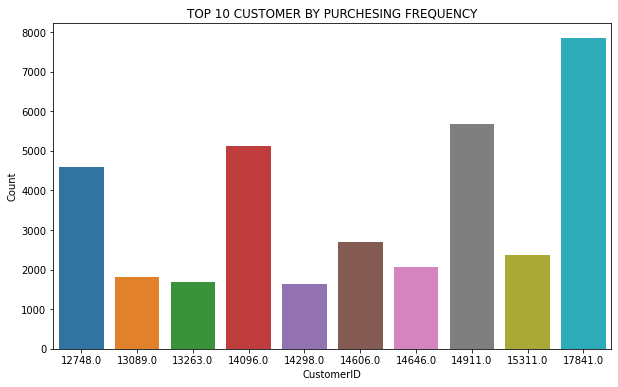

In [36]:
# Visualizing Top 10 Customer by their frquency of purchesing.
plt.figure(figsize=(10,6))
sns.barplot(y=Top_10['Count'],x=Top_10['CustomerID'])
plt.title('TOP 10 CUSTOMER BY PURCHESING FREQUENCY')
plt.show()

**OBSERVATION-**
* CustomerID-17841 has bought most products.
* .CustomerID-14911 has bought 2nd highest products.

In [37]:
Top5_countries = df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Count'})
Top5_countries

,Country,Count
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1462
9,Australia,1182


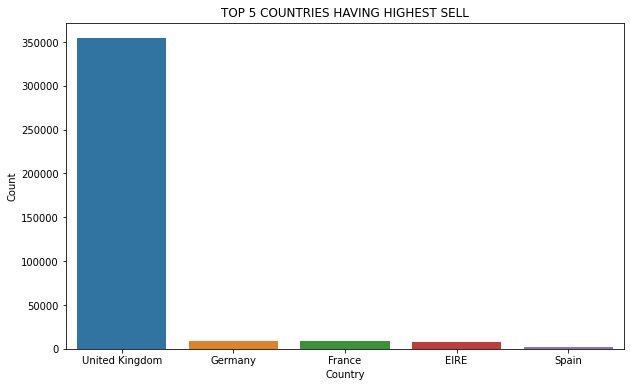

In [38]:
# Visualizing the Top 5 Countries wich has highest sell.
plt.figure(figsize=(10,6))
sns.barplot(x=Top5_countries['Country'].head(5),y=Top5_countries['Count'].head(5))
plt.title('TOP 5 COUNTRIES HAVING HIGHEST SELL')
plt.show()

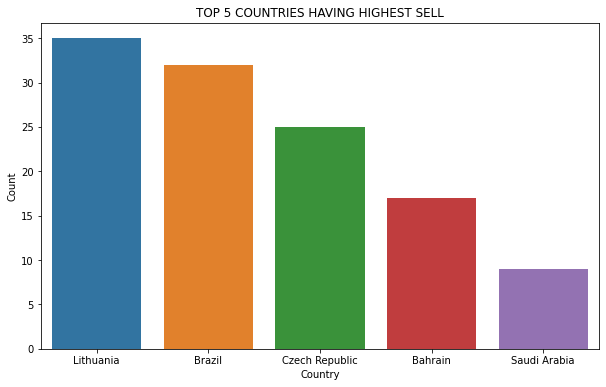

In [39]:
# Visualizing the Top 5 countries which has least no of customers.
plt.figure(figsize=(10,6))
sns.barplot(x=Top5_countries['Country'].tail(5),y=Top5_countries['Count'].tail(5))
plt.title('TOP 5 COUNTRIES HAVING HIGHEST SELL')
plt.show()

**OBSERVATION-**
* The country United Kingdom has the highest number of customer, which is preety obvious as per statement out data is mainly UK based data.
* On the other hand Saudi Arabia has least number of customers or low sell.

In [40]:
Sale_in_month = df['month'].value_counts().reset_index().rename(columns={'index':'month','month':'count'})
Sale_in_month

,month,count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320
5,June,27185
6,March,27175
7,August,27007
8,July,26825
9,April,22642


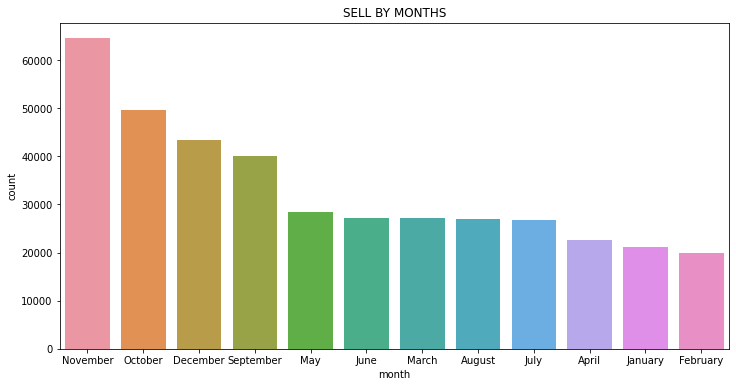

In [41]:
# Visualizing the sell by month.
plt.figure(figsize=(12,6))
sns.barplot(x=Sale_in_month['month'],y=Sale_in_month['count'].sort_values())
plt.title('SELL BY MONTHS')
plt.show()

**OBSERVATION-**
* In month of november the sale was very high.
* But at same time in month of february the sale was very low.

In [42]:
sales_on_day = df['day'].value_counts().reset_index().rename(columns={'index':'day','day':'count'})
sales_on_day

,day,count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773
5,Friday,54825


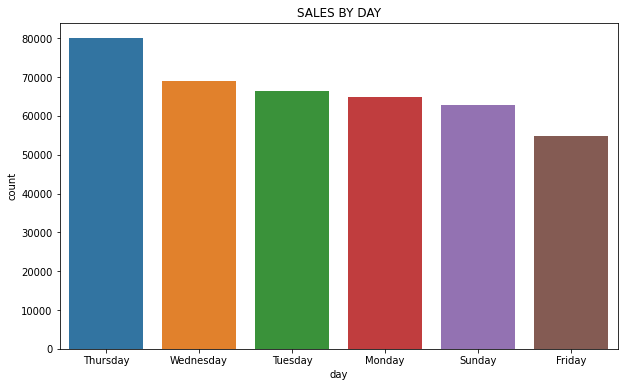

In [43]:
# lets see the sale on day basis.
plt.figure(figsize=(10,6))
sns.barplot(x=sales_on_day['day'],y=sales_on_day['count'])
plt.title('SALES BY DAY')
plt.show()

**OBSERVATION-**
* The highest count of sales occured on the Thursday, and sale at other day are significantly equal amount.

In [44]:
df['hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [45]:
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'

  else:
    return 'Evening'

In [46]:
df['day_time'] = df['hour'].apply(time)

In [47]:
sale_by_day_timming = df['day_time'].value_counts().reset_index().rename(columns={'index':'day_time','day_time':'count'})
sale_by_day_timming

,day_time,count
0,Afternoon,272738
1,Morning,118095
2,Evening,7051


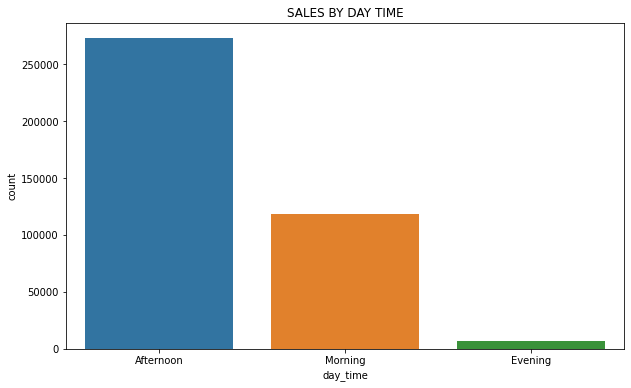

In [48]:
# Lets see the the count of sale on day time i.e 'Morning', 'Afternoon', 'Evening'.
plt.figure(figsize=(10,6))
sns.barplot(x=sale_by_day_timming['day_time'],y=sale_by_day_timming['count'])
plt.title('SALES BY DAY TIME')
plt.show()

**OBSERVATION-**
* At Afternoon session sale count is comparetivly high than Morning and Evening sessions.

In [49]:
# Avarage cost of expenditure by each customer.
avg_cost = df.groupby('CustomerID')['total_amount'].mean().reset_index().rename(columns={'total_amount':'avg_cost'}).sort_values('avg_cost',ascending=False)
avg_cost

,CustomerID,avg_cost
0,12346.0,77183.600000
3008,16446.0,56157.500000
2011,15098.0,13305.500000
2502,15749.0,4453.430000
2087,15195.0,3861.000000
...,...,...
3590,17254.0,2.432500
697,13271.0,2.264375
990,13684.0,2.241000
3995,17816.0,2.150588


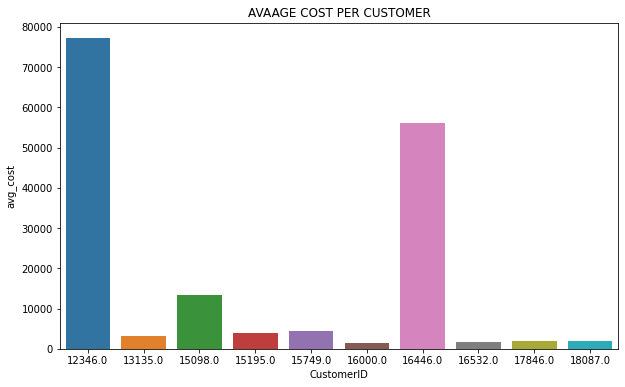

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_cost['CustomerID'].head(10),y=avg_cost['avg_cost'].head(10))
plt.title('AVAAGE COST PER CUSTOMER')
plt.show()

**OBSERVATION-**
* 77183 Is the highest avg cost spent by customer 12346.
* 56157 Is the second highest avg cost spent by customer 16446.

# **`MODEL BUILDING`**

# **RFM Model Analysis**

In [51]:
rfm_df = df.copy()

In [52]:
rfm_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day,hour,minute,month,total_amount,day_time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,Wednesday,8,26,December,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,8,26,December,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,Wednesday,8,26,December,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,8,26,December,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,8,26,December,20.34,Morning


In [53]:
# RFM stands for Recency Frequency Monetary.
# Recency = latest date - last Invoice generated date
# Frequency = Count of Invoice number of transaction.
# Monetary = Sum of Total amount for each customerID.

import datetime as dt 

# Set latest date = 2011-12-10 as Invoice date 2011-12-09, This is to calculate days from recent purchase.
latest_date = dt.datetime(2011,12,10)

# RFM Modelling score for each customer.
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'total_amount': lambda x: x.sum()})

# Coverting InvoiceDate in type int.
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# Rename column name into Recency, Frequency, Monetry.
rfm_df.rename(columns={'InvoiceDate':'Recency',
                       'InvoiceNo':'Frequency',
                       'total_amount':'Monetry'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetry
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [54]:
rfm_df['Recency'].describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

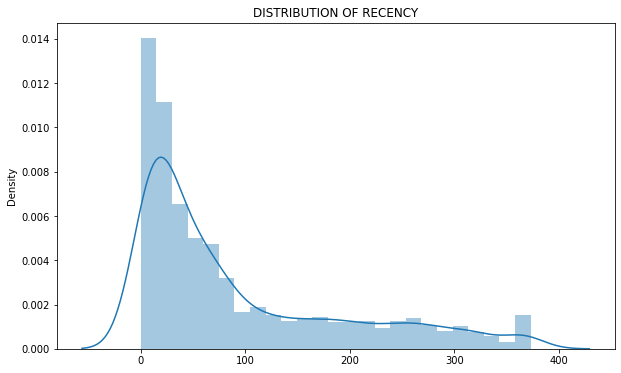

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(x=rfm_df['Recency'])
plt.title('DISTRIBUTION OF RECENCY')
plt.show()

In [56]:
rfm_df['Frequency'].describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

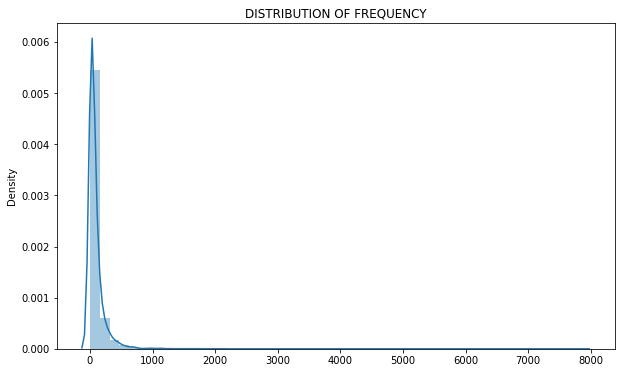

In [57]:
plt.figure(figsize=(10,6))
sns.distplot(x=rfm_df['Frequency'])
plt.title('DISTRIBUTION OF FREQUENCY')
plt.show()

In [58]:
rfm_df['Monetry'].describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetry, dtype: float64

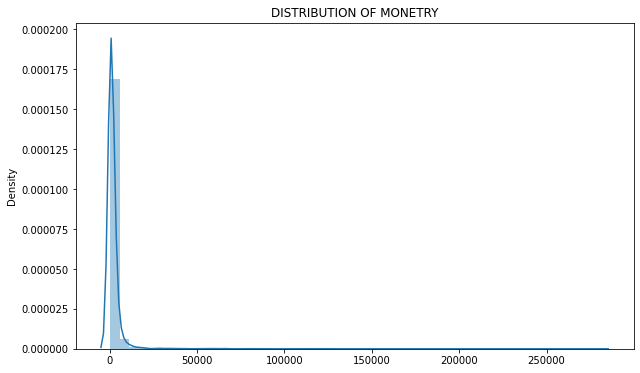

In [59]:
plt.figure(figsize=(10,6))
sns.distplot(x=rfm_df['Monetry'])
plt.title('DISTRIBUTION OF MONETRY')
plt.show()

In [60]:
# Splitting the data into four segment of quantile.
quantile = rfm_df.quantile(q=[0.25,0.5,0.75])

In [61]:
quantile = quantile.to_dict()

In [62]:
quantile

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetry': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [63]:
# Lets create the fuction of segment R, F and M.
# Note- Higher the recency good for business.
# x= value, p= (Reccency, Frequency, Monetry), d= dictonary of quantile.


def Rscoring(x,p,d):
  if x <=d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4
# Higher value of recency should be 1.


def FnMscoring(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.50]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1
# Higher value of frequency and monetery should be 4.

In [64]:
# Adding R, F, M segment to dataset.
rfm_df['R'] = rfm_df['Recency'].apply(Rscoring, args=('Recency',quantile))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMscoring, args=('Frequency',quantile))
rfm_df['M'] = rfm_df['Monetry'].apply(FnMscoring, args=('Monetry',quantile))

rfm_df.head()

,Recency,Frequency,Monetry,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [65]:
# Creating new column of RFM Group.
rfm_df['RFM'] = rfm_df.R.map(str)+rfm_df.F.map(str)+rfm_df.M.map(str)

In [66]:
# Calculate RFMscore value and add column showing total sum of RFM group value.
rfm_df['RFM_Score'] = rfm_df[['R','F','M']].sum(axis=1)
rfm_df.head()

,Recency,Frequency,Monetry,R,F,M,RFM,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [67]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int64  
 1   Frequency  4338 non-null   int64  
 2   Monetry    4338 non-null   float64
 3   R          4338 non-null   int64  
 4   F          4338 non-null   int64  
 5   M          4338 non-null   int64  
 6   RFM        4338 non-null   object 
 7   RFM_Score  4338 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 305.0+ KB


In [68]:
rfm_df['RFM_Score'].unique()

array([ 9,  3,  7,  5, 11, 12,  8,  4,  6, 10])

In [69]:
# Encoding loyalty level to each customer.
loyalty_level = ['Platinum','Gold','Silver','Bronz']
score_cut = pd.qcut(rfm_df['RFM_Score'],q=4,labels=loyalty_level)
rfm_df['Loyalty'] = score_cut.values
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetry,R,F,M,RFM,RFM_Score,Loyalty
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,18,73,1757.55,2,2,1,221,5,Platinum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronz


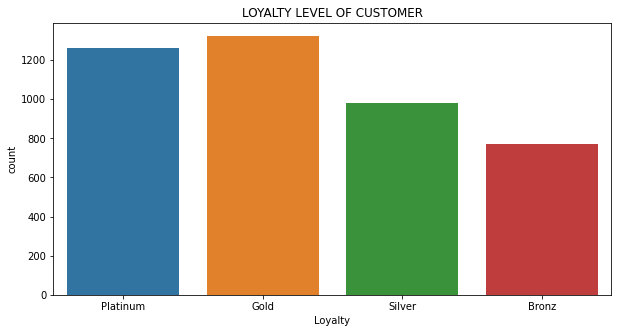

In [70]:
# Plot Loyalty level of customer.
plt.figure(figsize=(10,5))
sns.countplot(rfm_df['Loyalty'])
plt.title('LOYALTY LEVEL OF CUSTOMER')
plt.show()

In [71]:
# Our target customers.
rfm_df[rfm_df['Loyalty'] == 'Platinum'].sort_values('Monetry', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetry,R,F,M,RFM,RFM_Score,Loyalty
0,14646.0,1,2076,280206.02,1,1,1,111,3,Platinum
1,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
2,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
3,14911.0,1,5675,143825.06,1,1,1,111,3,Platinum
4,12415.0,24,714,124914.53,2,1,1,211,4,Platinum
5,14156.0,9,1400,117379.63,1,1,1,111,3,Platinum
6,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
7,16029.0,38,242,81024.84,2,1,1,211,4,Platinum
8,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
9,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum


In [72]:
segmentation_based_on_rfm = rfm_df[['Recency','Frequency','Monetry','Loyalty']]

In [73]:
segmentation_based_on_rfm.groupby('Loyalty').agg({'Recency':['mean','min','max'],
                                                  'Frequency':['mean','min','max'],
                                                  'Monetry':['mean','min','max','count']})

Recency            Frequency                Monetry          \
                mean min  max        mean min   max         mean     min   
Loyalty                                                                    
Platinum   19.412510   0  140  228.559778  20  7847  5255.277617  360.93   
Gold       63.376133   0  372   57.959970   1   543  1169.031202  114.34   
Silver    126.029562   1  373   24.503568   1    99   583.936944    6.90   
Bronz     217.261039  51  373   10.955844   1    41   199.159506    3.75   

                           
                max count  
Loyalty                    
Platinum  280206.02  1263  
Gold      168472.50  1324  
Silver     77183.60   981  
Bronz        660.00   770

In [74]:
# Handle zero and negaive value as to handle infinite numbers during log transformation.
def hand_neg_zero (num):
  if num <= 0:
    return 1
  else:
    return num

rfm_df['Recency'] = [hand_neg_zero(x) for x in rfm_df.Recency]
rfm_df['Monetry'] = [hand_neg_zero(x) for x in rfm_df.Monetry]

In [75]:
# Performing Log transformation to bring data in normal or near to normal distributon.
Log_rfm_df = rfm_df[['Recency','Frequency','Monetry']].apply(np.log, axis=1).round(2)

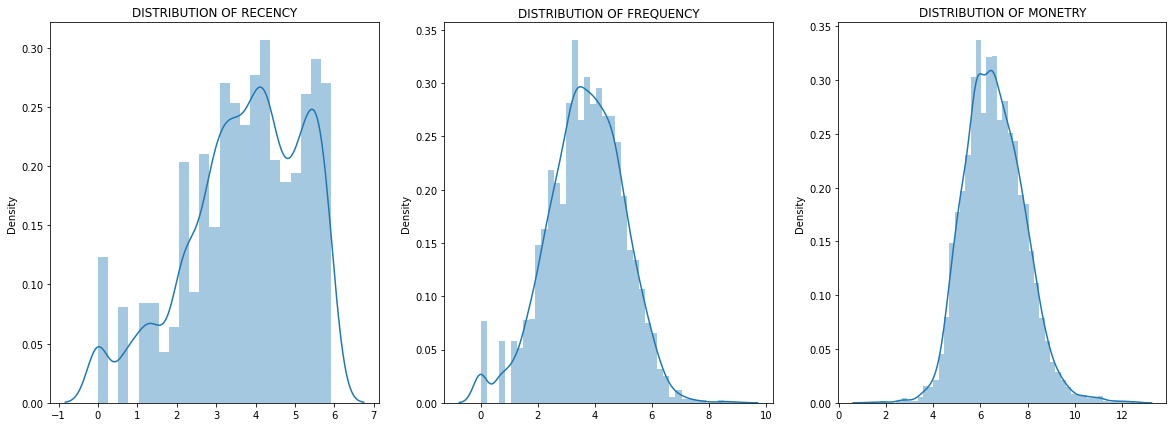

In [76]:
# lets visualize the Distribution of data.
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
sns.distplot(x=Log_rfm_df['Recency'])
plt.title('DISTRIBUTION OF RECENCY')

plt.subplot(1,3,2)
sns.distplot(x=Log_rfm_df['Frequency'])
plt.title('DISTRIBUTION OF FREQUENCY')

plt.subplot(1,3,3)
sns.distplot(x=Log_rfm_df['Monetry'])
plt.title('DISTRIBUTION OF MONETRY')

plt.show()

In [77]:
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetry_log'] = rfm_df['Monetry'].apply(math.log)

In [78]:
rfm_df.head()

,Recency,Frequency,Monetry,R,F,M,RFM,RFM_Score,Loyalty,Recency_log,Frequency_log,Monetry_log
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,2.890372,4.290459,7.471676
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338


# **`K-Means Clustring`**

In [79]:
# Importing liabraries.
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import k_means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler

In [80]:
! pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Before implementing k-means clustring algorithm we need to decide nuumber of cluster to put inside algorithm as input, So we will be finding minimum number of cluster require by using elbow method.**

# **RECENCY AND MONETRY**

## **Applying Elbow method on Recency and Monetry.**

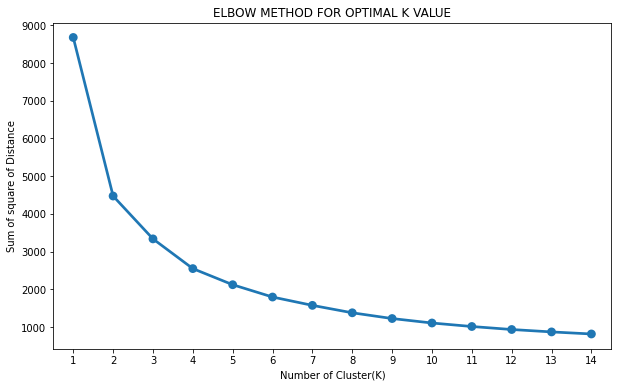

In [81]:
# Recency and Monetry_log in list.
recency_and_monetry_list = ['Recency_log','Monetry_log']

# Taking only recency and monetry values in x.
x = rfm_df[recency_and_monetry_list].values

# Standerdizing the data.
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Applying Elbow method.
wcss = {}
for k in range(1,15):
  km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
  km = km.fit(x)
  wcss[k] = km.inertia_

# Plot the graph for sum of square distance value and number of cluster.
plt.figure(figsize=(10,6))
sns.pointplot(x=list(wcss.keys()),y=list(wcss.values()))
plt.xlabel('Number of Cluster(K)')
plt.ylabel('Sum of square of Distance')
plt.title('ELBOW METHOD FOR OPTIMAL K VALUE')
plt.show()

* **OPTIMAL VALUE OF CLUSTER CAME OUT TO BE 2**

## Cross Verifying with ElbowVisualizer.

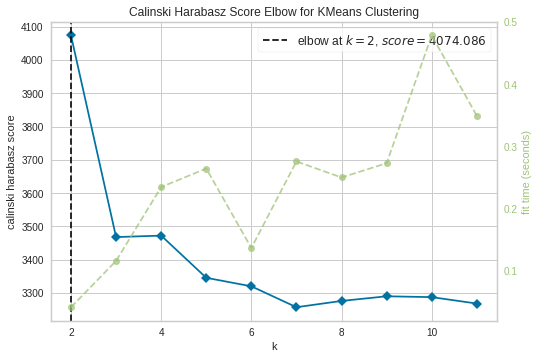

In [82]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric= 'calinski_harabasz', timming=True)

visualizer.fit(x)
visualizer.show()

* **ELBOW VISUALIZER ALSO SHOWS OPTIMAL VALUE OF K IS 2**

## `SILHOUTTE SCORE`

In [83]:
# Taking recency and monetry_log in list.
recency_and_monetry_list = ['Recency_log','Monetry_log']

# Taking values for Recency and Monetry log for x.
x = rfm_df[recency_and_monetry_list].values

# Standerdizing the data.
scaler = StandardScaler()
scaler = scaler.fit_transform(x)

# Silhoutte score.
Ranges_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_cluster in Ranges_n_clusters:
  clustrer = KMeans(n_clusters=n_cluster,random_state=1)
  predict = clustrer.fit_predict(x)
  centers = clustrer.cluster_centers_

  score = silhouette_score(x, predict)
  print('For n cluster {}, silhoutte score is {}'.format(n_cluster,score))

For n cluster 2, silhoutte score is 0.42604215468023315
For n cluster 3, silhoutte score is 0.3552710464498244
For n cluster 4, silhoutte score is 0.3690948479772705
For n cluster 5, silhoutte score is 0.35686102059796876
For n cluster 6, silhoutte score is 0.35401712658402346
For n cluster 7, silhoutte score is 0.35291621414214897
For n cluster 8, silhoutte score is 0.3368681151082786
For n cluster 9, silhoutte score is 0.3473965542899301
For n cluster 10, silhoutte score is 0.34479089397629203
For n cluster 11, silhoutte score is 0.34460029006191684
For n cluster 12, silhoutte score is 0.3433837098670984
For n cluster 13, silhoutte score is 0.33707762464813396
For n cluster 14, silhoutte score is 0.3345838463397413
For n cluster 15, silhoutte score is 0.33705704734861924


**Here we can see that for n_cluster = 2 the silhoutte score is good as compared to others, If value is close to 1 that means data points are clustered very well to respective cluster and the distance of datapoints are very far from the other datapoint.**

For n_clusters = 2 The average silhouette_score is : 0.42604215468023315
For n_clusters = 3 The average silhouette_score is : 0.3552710464498244
For n_clusters = 4 The average silhouette_score is : 0.3690948479772705
For n_clusters = 5 The average silhouette_score is : 0.35686102059796876
For n_clusters = 6 The average silhouette_score is : 0.35401712658402346
For n_clusters = 7 The average silhouette_score is : 0.35291621414214897
For n_clusters = 8 The average silhouette_score is : 0.3368681151082786
For n_clusters = 9 The average silhouette_score is : 0.3473965542899301
For n_clusters = 10 The average silhouette_score is : 0.34479089397629203


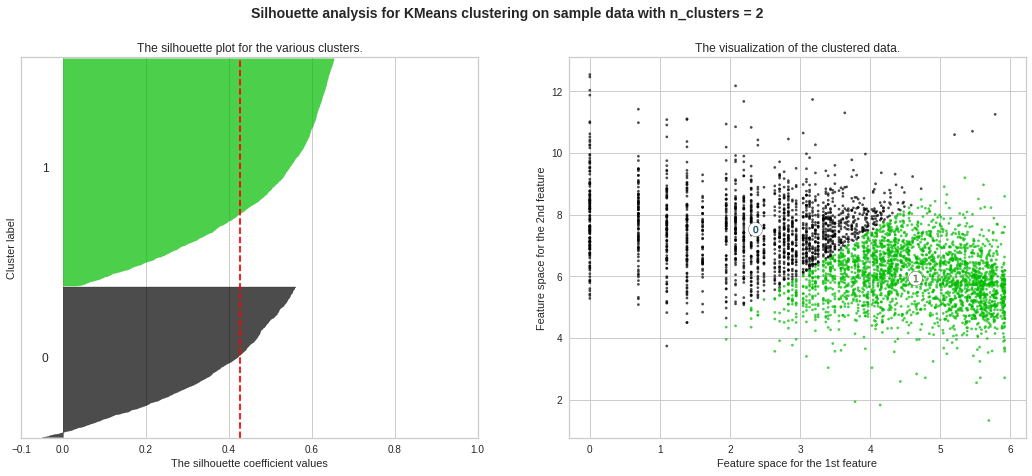

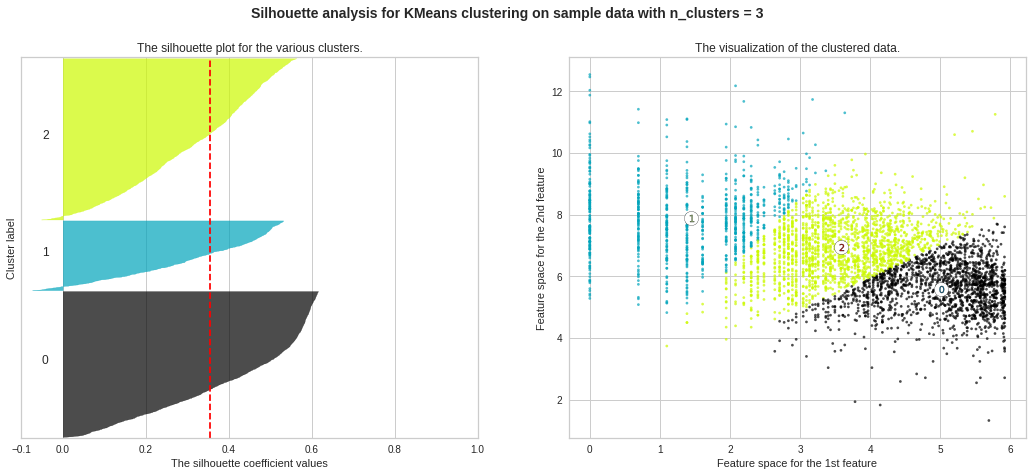

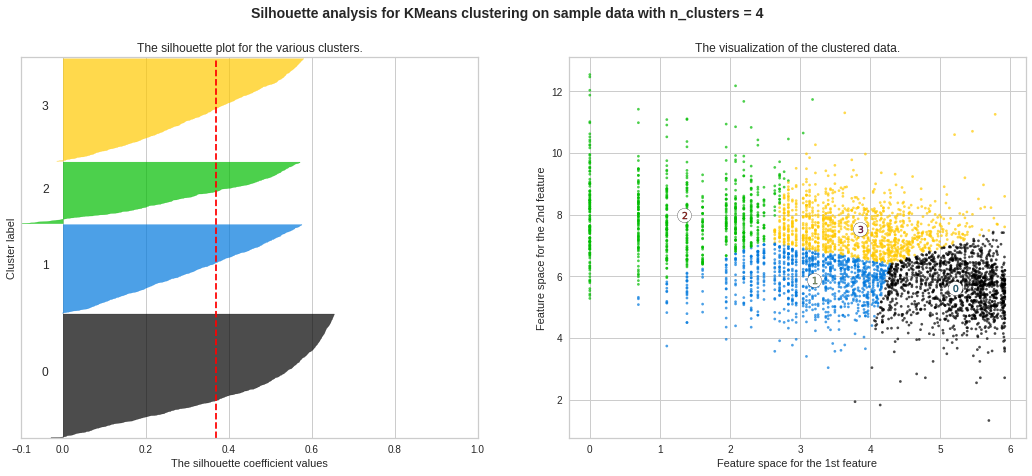

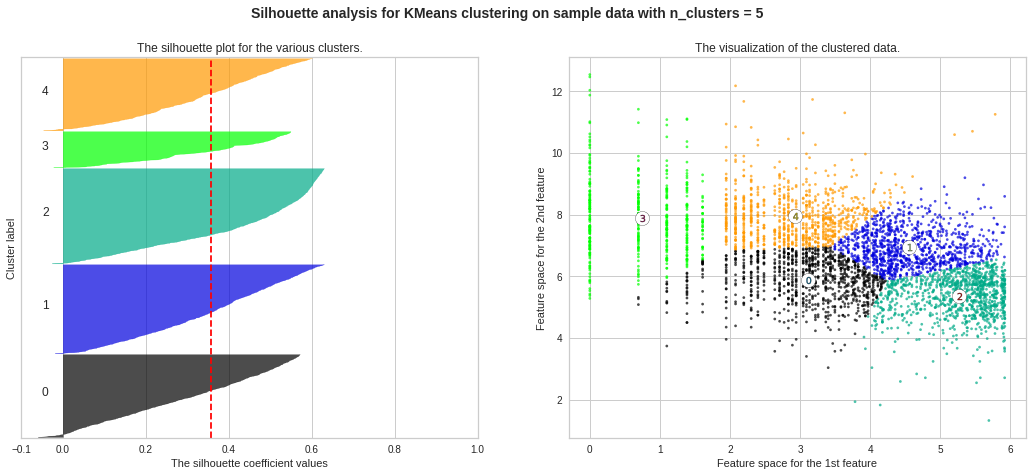

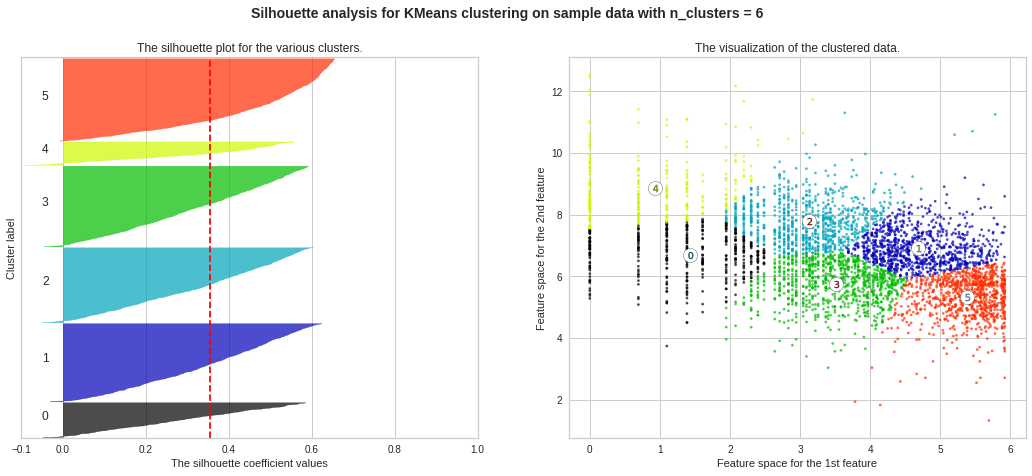

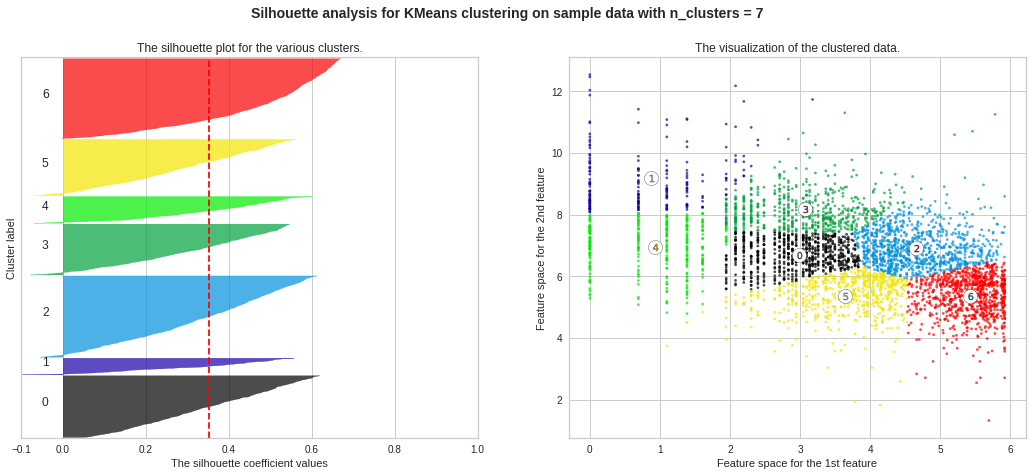

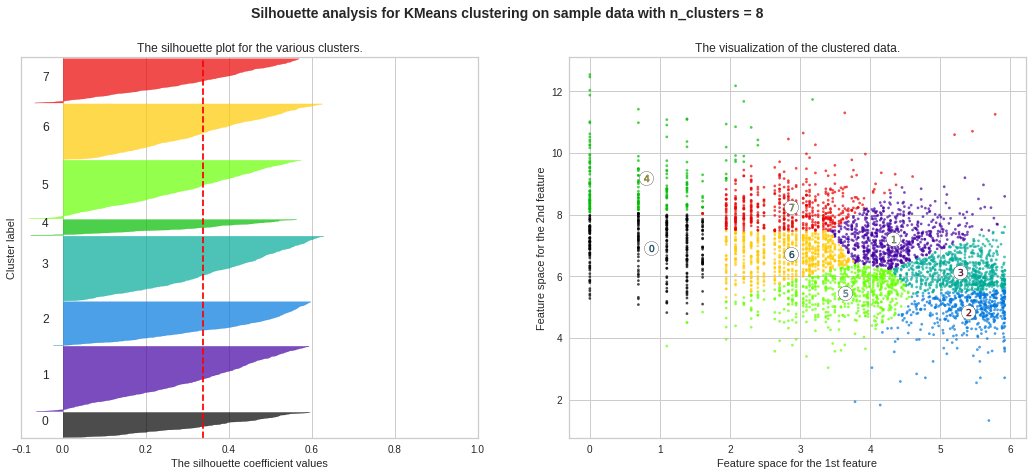

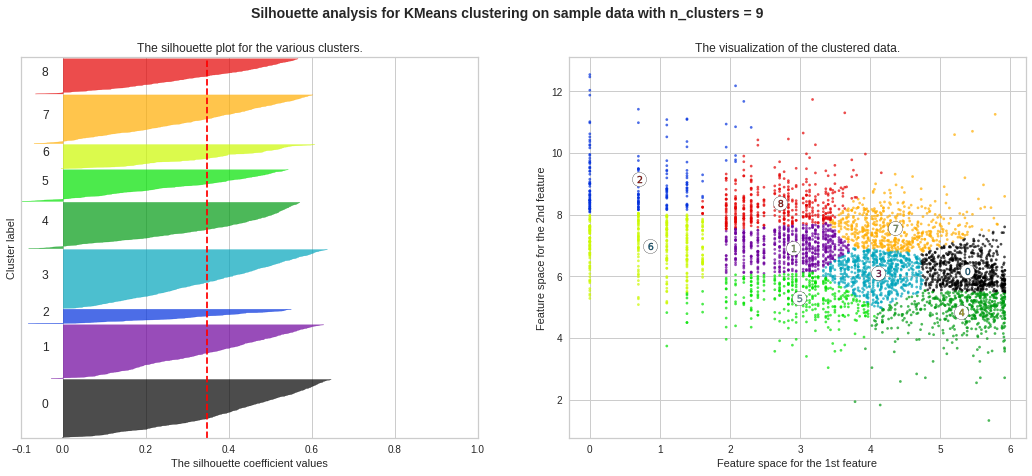

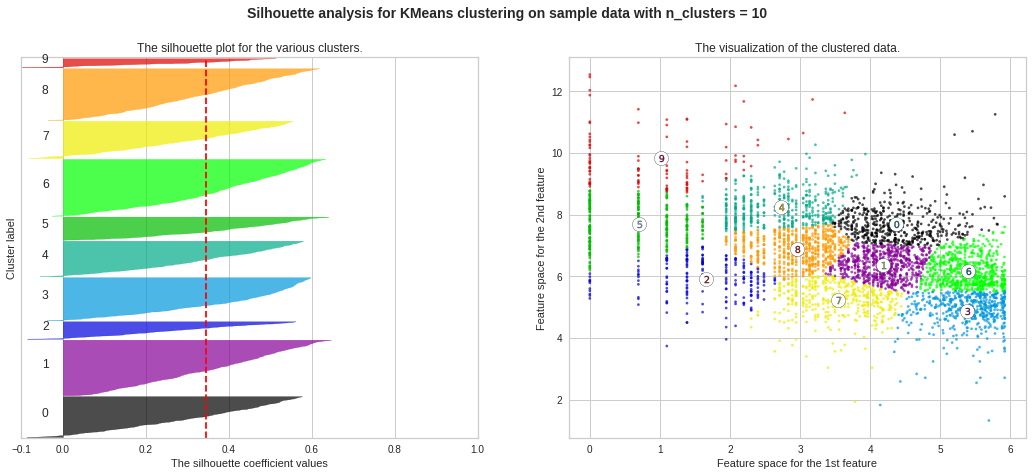

In [84]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# **So giving n_cluster = 2 on model**

In [85]:
# Applying kmeans clustring algorithm
kmeans_algo = KMeans(n_clusters=2)
kmeans_algo.fit(x)
y_kmeans = kmeans_algo.predict(x)

In [86]:
# find the cluster for the observation given in the dataset.
rfm_df['Cluster_based'] = kmeans_algo.labels_
rfm_df.head()

,Recency,Frequency,Monetry,R,F,M,RFM,RFM_Score,Loyalty,Recency_log,Frequency_log,Monetry_log,Cluster_based
CustomerID,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942,0
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693,0
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,1
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,2.890372,4.290459,7.471676,0
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338,1


In [87]:
# Co-ordinate of centers of the clsuters.
centers = kmeans_algo.cluster_centers_
centers

array([[2.36839815, 7.54018279],
       [4.65120152, 5.95675392]])

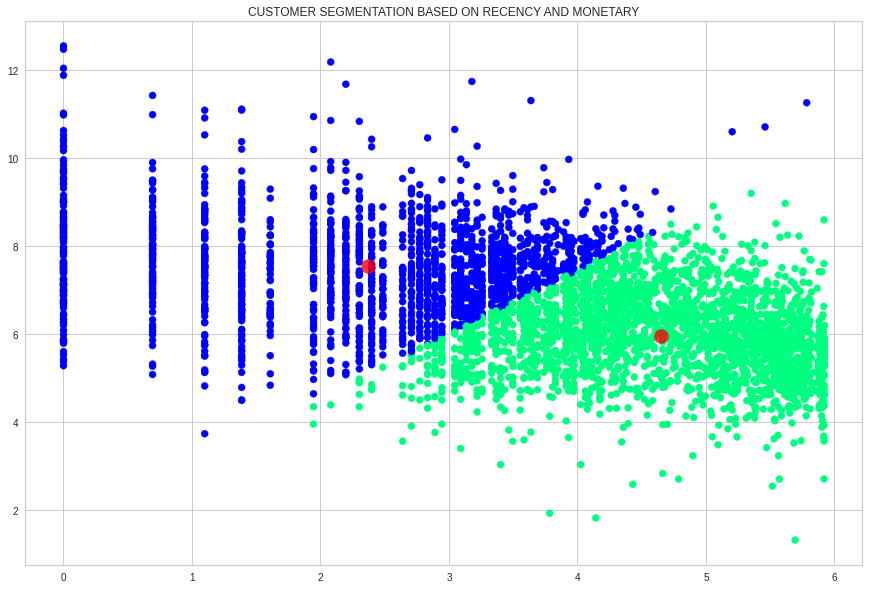

In [88]:
# Plotting the clusters.
plt.figure(figsize=(15,10))
plt.scatter(x[:,0], x[:, 1], s=50, c=y_kmeans, cmap='winter', )
plt.title('CUSTOMER SEGMENTATION BASED ON RECENCY AND MONETARY')

centers = kmeans_algo.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.8)